In [1]:
import tensorflow as tf
from tensorflow import keras as ks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use("ggplot")
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [3]:
data = pd.read_csv('../input/pokemon-images-and-types/pokemon.csv')
data.shape

(809, 3)

In [4]:
data.head()

,Name,Type1,Type2
0,bulbasaur,Grass,Poison
1,ivysaur,Grass,Poison
2,venusaur,Grass,Poison
3,charmander,Fire,NaN
4,charmeleon,Fire,NaN


In [5]:
data = data.sort_values(by=['Name'], ascending=True).reset_index(drop=True)

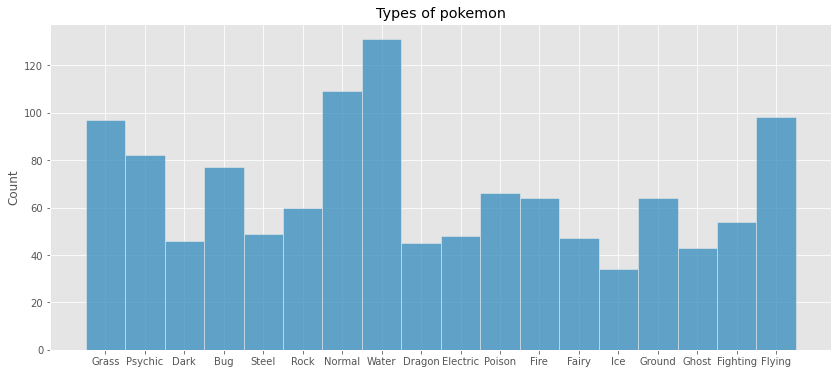

In [6]:
X=data['Type1'].tolist()+data["Type2"].tolist()
plt.figure(figsize=(14, 6))
sns.histplot(x=X)
plt.title('Types of pokemon')
plt.show()

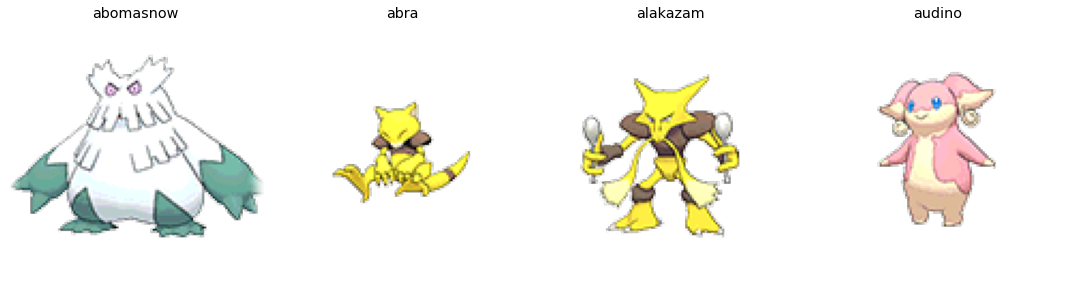

In [7]:
import matplotlib.image as mpimg
path = '../input/pokemon-images-and-types/images/images/'
fig,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 10))
ax = [ax1, ax2, ax3, ax4]
for i in range(4):
    img = mpimg.imread(path+data['Name'][i**3]+'.png')
    ax[i].imshow(img)
    ax[i].set_title(data['Name'][i**3])
    ax[i].axis('off')
plt.tight_layout()
plt.show()
    

In [8]:
path='../input/pokemon-images-and-types/images/images/'
img_name = sorted(os.listdir('../input/pokemon-images-and-types/images/images/'))
img_paths = []
for i in img_name:
    img_paths.append(path + i)
data['path'] = img_paths

In [9]:
data.head()

,Name,Type1,Type2,path
0,abomasnow,Grass,Ice,../input/pokemon-images-and-types/images/image...
1,abra,Psychic,NaN,../input/pokemon-images-and-types/images/image...
2,absol,Dark,NaN,../input/pokemon-images-and-types/images/image...
3,accelgor,Bug,NaN,../input/pokemon-images-and-types/images/image...
4,aegislash-blade,Steel,Ghost,../input/pokemon-images-and-types/images/image...


In [10]:
data["Type1"].unique()

array(['Grass', 'Psychic', 'Dark', 'Bug', 'Steel', 'Rock', 'Normal',
       'Water', 'Dragon', 'Electric', 'Poison', 'Fire', 'Fairy', 'Ice',
       'Ground', 'Ghost', 'Fighting', 'Flying'], dtype=object)

In [11]:
print(len(data["Type1"].unique()),len(data["Type2"].unique()))

18 19


In [12]:
Type = []
ind = []

for i in range(data.shape[0]):
    if (data.iloc[i]['Type1']=='Grass') or (data.iloc[i]['Type2']=='Grass'):
        Type.append('Grass')
        ind.append(1)
    elif (data.iloc[i]['Type1']=='Water') or (data.iloc[i]['Type2']=='Water'):
        Type.append('Water')
        ind.append(2)
    elif (data.iloc[i]['Type1']=='Fire') or (data.iloc[i]['Type2']=='Fire'):
        Type.append('Fire')
        ind.append(3)
    elif (data.iloc[i]['Type1']=='Psychic') or (data.iloc[i]['Type2']=='Psychic'):
        Type.append('Psychic')
        ind.append(4)
    elif (data.iloc[i]['Type1']=='Normal') or (data.iloc[i]['Type2']=='Normal'):
        Type.append('Normal')
        ind.append(5)
    elif (data.iloc[i]['Type1']=='Ground') or (data.iloc[i]['Type2']=='Ground'):
        Type.append('Fire')
        ind.append(6)
  
    else:
        Type.append('NaN')
        ind.append('NaN')

In [13]:
data["type"]=Type
data["ind"]=ind
data = data.drop(['Type1', 'Type2', 'Name'], axis=1)
data = data[data['type']!='NaN']

In [14]:
data.head()

,path,type,ind
0,../input/pokemon-images-and-types/images/image...,Grass,1
1,../input/pokemon-images-and-types/images/image...,Psychic,4
7,../input/pokemon-images-and-types/images/image...,Normal,5
8,../input/pokemon-images-and-types/images/image...,Psychic,4
9,../input/pokemon-images-and-types/images/image...,Water,2


Text(0, 0.5, 'Number of images')

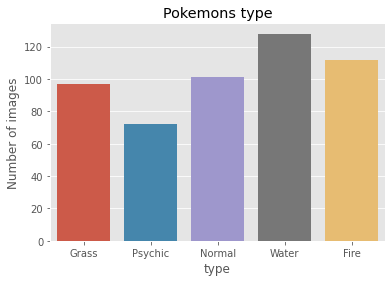

In [15]:
sns.countplot(x=data.type,)
plt.title('Pokemons type')
plt.ylabel('Number of images')

In [16]:
train_datagenerator = ImageDataGenerator(
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=.2, 
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest',
    validation_split=0.1)

train_generator = train_datagenerator.flow_from_dataframe(
    data, 
    x_col='path', 
    y_col='type',
    target_size=(120, 120), 
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=32, 
    shuffle=True, 
    seed=1,
    subset='training')
validation_generator = train_datagenerator.flow_from_dataframe(
    data , 
    x_col='path',
    y_col='type',
    target_size=(120, 120),
    color_mode='rgba', 
    class_mode='categorical', 
    batch_size=4, 
    shuffle=True,
    seed=1, 
    subset='validation'
)

Found 459 validated image filenames belonging to 5 classes.
Found 51 validated image filenames belonging to 5 classes.


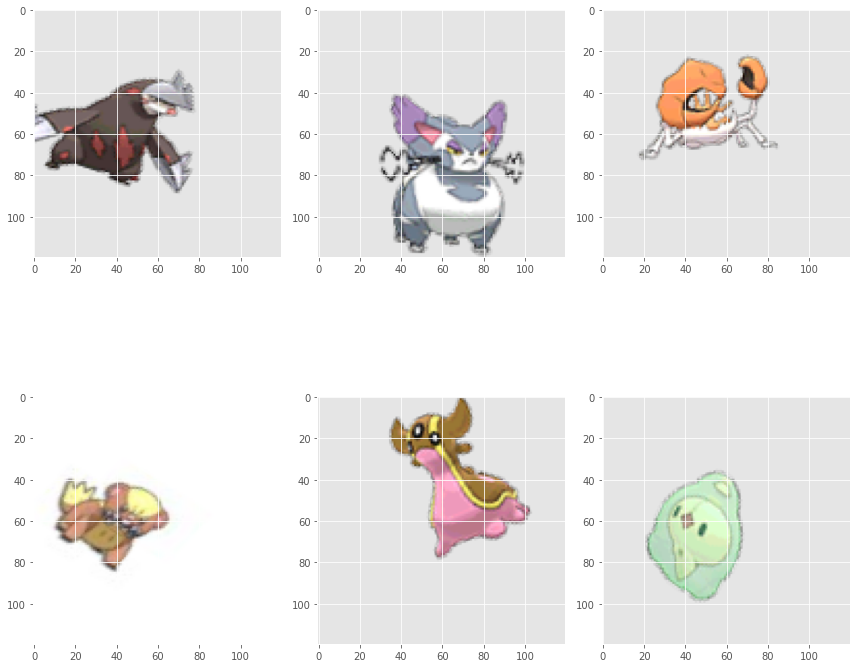

In [17]:
plt.figure(figsize=(12, 12))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [18]:

        model = ks.models.Sequential()

        model.add(ks.layers.Dense(4, input_shape=(120, 120, 4)))

        model.add(ks.layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(ks.layers.MaxPooling2D(2, 2))

        model.add(ks.layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(ks.layers.MaxPooling2D(2, 2))


        model.add(ks.layers.Conv2D(256, (3, 3), activation='relu'))
        model.add(ks.layers.MaxPooling2D(2, 2))

        model.add(ks.layers.Conv2D(512, (3, 3), activation='relu'))
        model.add(ks.layers.MaxPooling2D(2, 2))
        model.add(ks.layers.Dropout(0.2))

        
        model.add(ks.layers.Flatten())
        
        model.add(ks.layers.Dense(1024, activation='relu'))

        model.add(ks.layers.Dense(5, activation='softmax'))

        model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
        


2022-04-01 22:13:26.151129: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-01 22:13:26.239268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-01 22:13:26.240000: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-01 22:13:26.241157: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120, 120, 4)       20        
_________________________________________________________________
conv2d (Conv2D)              (None, 118, 118, 64)      2368      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0

In [20]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [21]:
model.layers

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.7) and (logs.get('val_acc')>0.7):
            print('\n reached 70% accuarcy so stopping training')
            self.model.stop_training = True
callbacks = myCallback()


In [23]:
batch_size=15
FAST_RUN = False

In [24]:
epochs=5 if FAST_RUN else 100
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(), 
        callbacks
    ]
)

2022-04-01 22:13:29.582568: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-04-01 22:13:31.957763: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


15/15 [==============================] - 11s 260ms/step - loss: 1.6662 - acc: 0.2222 - val_loss: 1.5982 - val_acc: 0.2745
Epoch 2/100
15/15 [==============================] - 3s 193ms/step - loss: 1.6057 - acc: 0.2222 - val_loss: 1.6032 - val_acc: 0.2745
Epoch 3/100
15/15 [==============================] - 3s 219ms/step - loss: 1.5981 - acc: 0.2484 - val_loss: 1.6054 - val_acc: 0.2745
Epoch 4/100
15/15 [==============================] - 3s 180ms/step - loss: 1.5907 - acc: 0.2636 - val_loss: 1.6058 - val_acc: 0.3333
Epoch 5/100
15/15 [==============================] - 3s 192ms/step - loss: 1.5671 - acc: 0.3246 - val_loss: 1.5904 - val_acc: 0.2353
Epoch 6/100
15/15 [==============================] - 3s 180ms/step - loss: 1.5403 - acc: 0.3442 - val_loss: 1.5740 - val_acc: 0.2549
Epoch 7/100
15/15 [==============================] - 3s 173ms/step - loss: 1.5391 - acc: 0.3333 - val_loss: 1.5927 - val_acc: 0.2157
Epoch 8/100
15/15 [==============================] - 3s 182ms/step - loss: 1.526

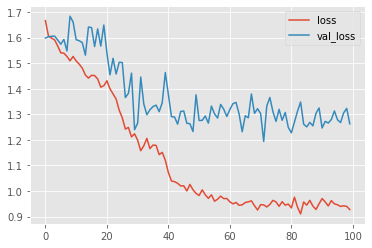

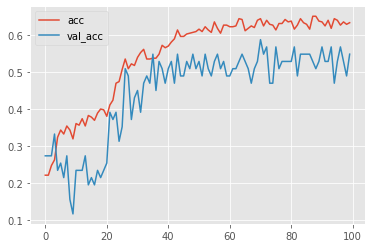

In [25]:
history_frame = pd.DataFrame(history.history)

history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['acc', 'val_acc']].plot();